In [1]:
import uproot
from glob import glob
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
#SWAN 
base_directory = "/eos/user/d/dgrove/datasets/"

files = sorted(glob(f"{base_directory}TSlepSlep/combined.root"))


file = uproot.open(files[0])
#events = NanoEventsFactory.from_root(files).events()

print("Number of TSlepSlep files: {0}".format(len(files)))
print("file info:")
dict(file)

Number of TSlepSlep files: 1
file info:


{'tag;4': <TObjString 'untagged' at 0x7f1ab9e7e6d0>,
 'tag;3': <TObjString 'untagged' at 0x7f1ab9e7e7b0>,
 'tag;2': <TObjString 'untagged' at 0x7f1ab9e7e890>,
 'tag;1': <TObjString 'untagged' at 0x7f1ab9e7e970>,
 'Events;1': <TTree 'Events' (815 branches) at 0x7f1ab9e86f10>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (2 branches) at 0x7f1ab9e86df0>,
 'Runs;1': <TTree 'Runs' (1443 branches) at 0x7f1ab9e86f70>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7f1ab9e86a90>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7f1884a5d820>}

In [2]:
events = NanoEventsFactory.from_root(files[0]).events()
len(events)

/eos/user/d/dgrove/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/eos/user/d/dgrove/.local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:205: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(


4895839

In [3]:
import awkward as ak
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import mplhep


mplhep.style.use(mplhep.style.CMS)

In [4]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

from coffea.analysis_tools import PackedSelection

selection = PackedSelection()

selection.add("e pt", ak.any(events.Electron.pt >= 5, axis=1))
selection.add("e eta", ak.any(np.abs(events.Electron.eta) < 2.4, axis=1))
selection.add("e SIP3D", ak.any(events.Electron.sip3d < 8, axis=1))
selection.add("e dxy", ak.any(np.abs(events.Electron.dxy) < 0.05, axis=1))
selection.add("e dz", ak.any(np.abs(events.Electron.dz) < 0.1, axis=1))
selection.add("e miniPFRelIso", ak.any(events.Electron.miniPFRelIso_all < (20 + 300/events.Electron.pt), axis =1))

selection.add("mu pt", ak.any(events.Muon.pt >= 3, axis=1))
selection.add("mu eta", ak.any(np.abs(events.Muon.eta) < 2.4, axis=1))
selection.add("mu SIP3D", ak.any(events.Muon.sip3d < 8, axis=1))
selection.add("mu dxy", ak.any(np.abs(events.Muon.dxy) < 0.05, axis=1))
selection.add("mu dz", ak.any(np.abs(events.Muon.dz) < 0.1, axis=1))
selection.add("mu miniPFRelIso", ak.any(events.Muon.miniPFRelIso_all < (20 + 300/events.Muon.pt), axis=1))

# individual cuts above, all in one selection cuts below:
# please use cuts below if doing preselection cut lest you run into some logical bugs down the road

selection.add("e selection", ak.any((events.Electron.pt >= 5) & (np.abs(events.Electron.eta) < 2.4) & (events.Electron.sip3d < 8) & (np.abs(events.Electron.dxy) < 0.05) & (np.abs(events.Electron.dz) < 0.1) & (events.Electron.miniPFRelIso_all < (20 + 300/events.Electron.pt)), axis=1))

selection.add("mu selection", ak.any((events.Muon.pt >= 5) & (np.abs(events.Muon.eta) < 2.4) & (events.Muon.sip3d < 8) & (np.abs(events.Muon.dxy) < 0.05) & (np.abs(events.Muon.dz) < 0.1) & (events.Muon.miniPFRelIso_all < (20 + 300/events.Muon.pt)), axis=1))
#events = events[selection.any("e selection", "mu selection")]
#len(events)

[3, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, ... 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0]
[True, False, True, True, False, True, ... True, True, True, False, False, False]
[[472, 377, 28.8], [445, 276], [88.9, 85.5], ... [373, 81.5], [512, 285], [152, 121]]
[472, 445, 88.9, 407, 119, 162, 202, 298, ... 188, 304, 412, 267, 294, 373, 512, 152]
[377, 276, 85.5, 59.7, 115, 134, 54.4, 120, ... 90.6, 229, 83.4, 266, 81.5, 285, 121]


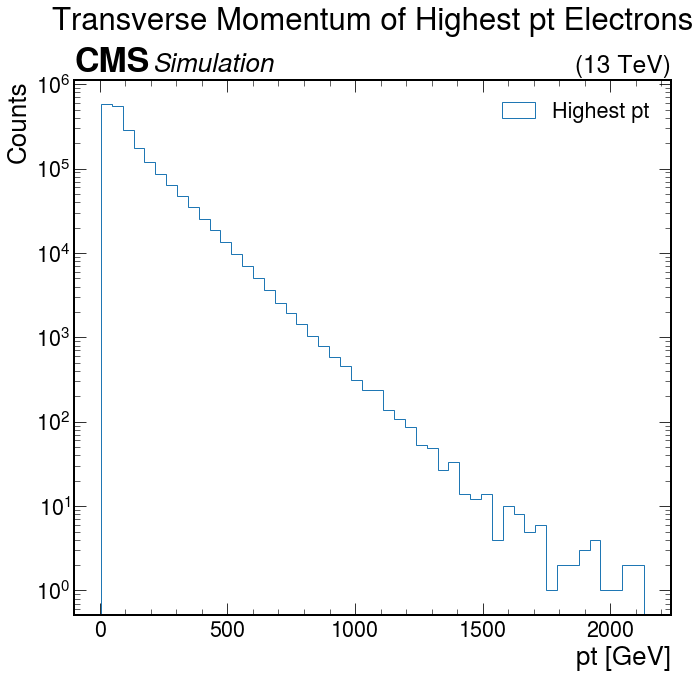

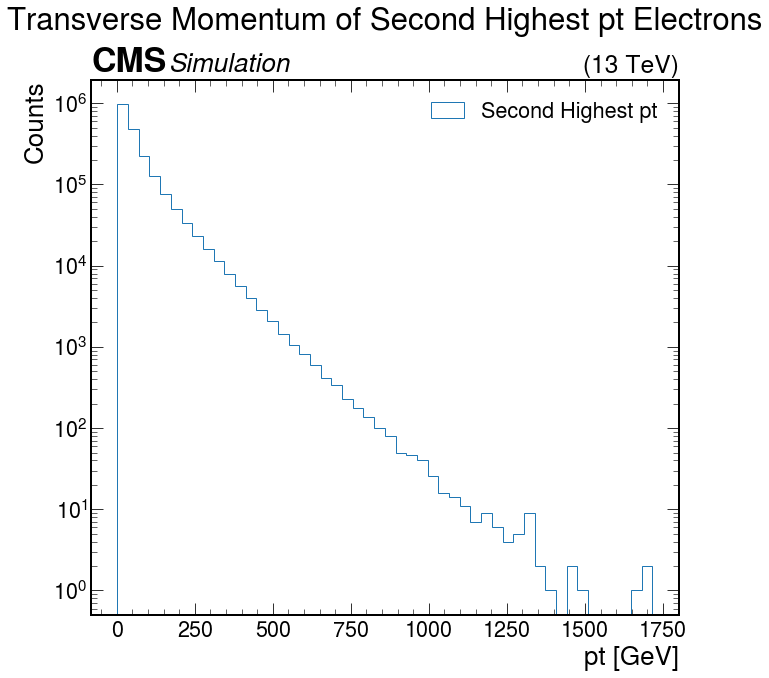

In [5]:
electrons = events.Electron
dielectron_events = electrons[ak.num(electrons)>=2]

#gtoe_2e_mc = ak.num(mcevents.Electron[ak.num(mcevents.Electron)>=2], axis=0)
print(ak.num(electrons))
print(ak.num(electrons)>=2)
dielectron_events

# Sort the electrons by pt in each event
sorted_dielectron_events = dielectron_events[ak.argsort(dielectron_events.pt, axis=1, ascending=False)]
print(sorted_dielectron_events.pt)

# Select the highest pt electrons
highest_pt_electrons = sorted_dielectron_events[:, 0]  # First electron in each event
print(highest_pt_electrons.pt)

# Select the second-highest pt electrons
second_highest_pt_electrons = sorted_dielectron_events[:, 1]  # Second electron in each event
print(second_highest_pt_electrons.pt)

# Plot the highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(highest_pt_electrons.pt), bins=50, histtype='step', label="Highest pt")
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Highest pt Electrons", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

# Plot the second-highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(second_highest_pt_electrons.pt), bins=50, histtype='step', label="Second Highest pt")
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Second Highest pt Electrons", pad=50)  # Adjust title position
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

[0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, ... 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2]
[False, True, False, False, True, False, ... False, False, False, True, True, True]
[[404, 52.8], [369, 65.5], [511, 315], ... [641, 319], [430, 340], [733, 708]]
[404, 369, 511, 371, 267, 435, 315, 286, ... 302, 101, 172, 464, 633, 641, 430, 733]
[52.8, 65.5, 315, 238, 79, 91.1, 230, 171, ... 70.1, 126, 123, 136, 319, 340, 708]


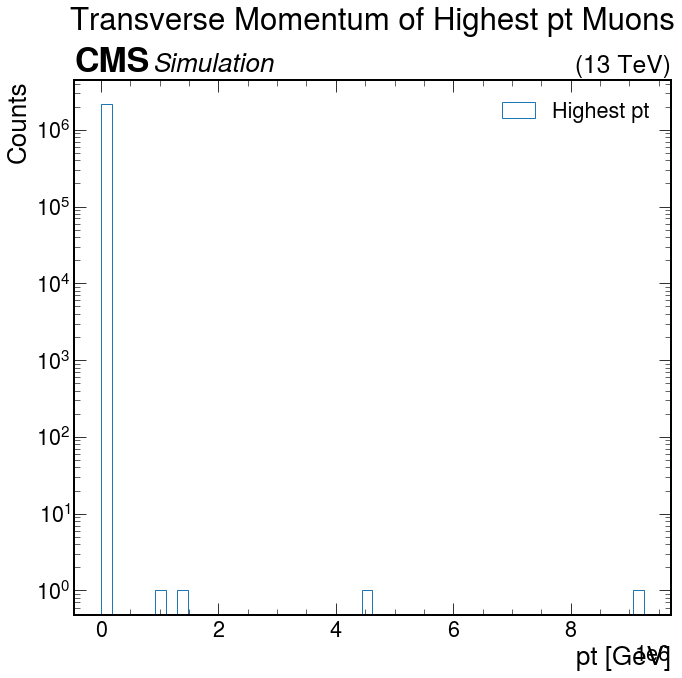

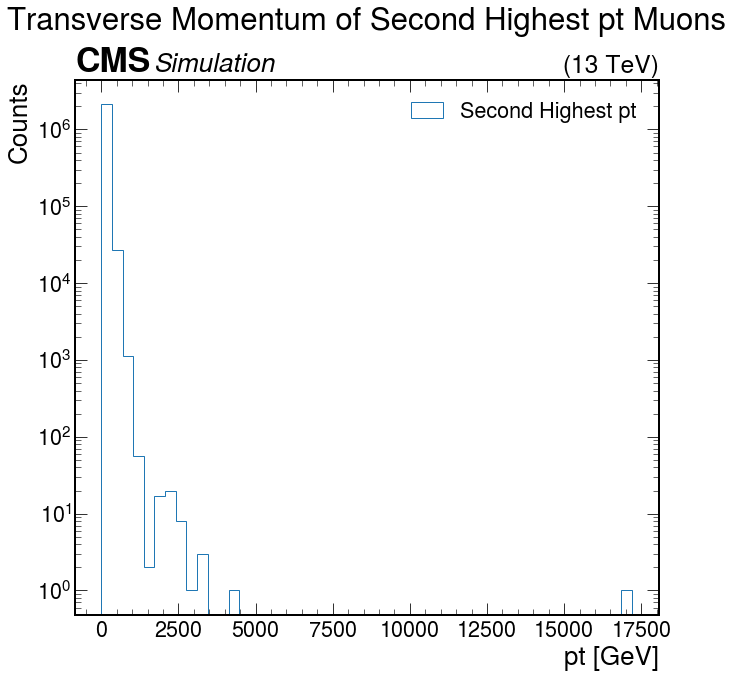

In [6]:
# Access the muon collection
muons = events.Muon
#muons = muons[muons.pt <= 200000]

# Select events with 2 or more muons
dimuon_events = muons[ak.num(muons) >= 2]

# Print some debugging information
print(ak.num(muons))
print(ak.num(muons) >= 2)

# Sort the muons by pt in each event
sorted_dimuon_events = dimuon_events[ak.argsort(dimuon_events.pt, axis=1, ascending=False)]
print(sorted_dimuon_events.pt)

# Select the highest pt muons
highest_pt_muons = sorted_dimuon_events[:, 0]  # First muon in each event
print(highest_pt_muons.pt)

# Select the second-highest pt muons
second_highest_pt_muons = sorted_dimuon_events[:, 1]  # Second muon in each event
print(second_highest_pt_muons.pt)

# Plot the highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(highest_pt_muons.pt), bins=50, histtype='step', label="Highest pt")
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Highest pt Muons", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

# Plot the second-highest pt histogram
plt.figure()
plt.hist(ak.to_numpy(second_highest_pt_muons.pt), bins=50, histtype='step', label="Second Highest pt")
plt.xlabel("pt [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Transverse Momentum of Second Highest pt Muons", pad=50)  # Adjust title position
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

In [7]:
genparts = events.GenPart
#print(genparts.pdgId[genparts.pdgId > 100])
print("sorted list of all particle pdg id's in TSlepSlep MC")
genid = ak.to_numpy(ak.flatten(genparts.pdgId)) # Cast to numpy array after flatten
genid = np.unique(genid) # Reducing to unique values 
genid = np.sort(genid)
print(genid)

sorted list of all particle pdg id's in TSlepSlep MC
[-2000013 -2000011 -1000013 -1000011   -20433    -5334    -5332    -5324
    -5322    -5314    -5312    -5232    -5224    -5222    -5214    -5212
    -5132    -5122    -5114    -5112    -4334    -4332    -4324    -4322
    -4314    -4312    -4232    -4224    -4222    -4214    -4212    -4132
    -4124    -4122    -4114    -4112    -3214    -3212    -2214    -2114
     -543     -541     -533     -531     -523     -521     -513     -511
     -435     -433     -431     -425     -423     -421     -415     -413
     -411     -323     -321     -313     -311     -213     -211      -16
      -15      -14      -13      -12      -11       -5       -4       -3
       -2       -1        1        2        3        4        5       11
       12       13       14       15       16       21       22      111
      113      130      211      213      221      223      310      311
      313      321      323      331      333      411      413      41

For reference, from the [pdg id table](https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf): 

$\tilde{e}^-_{L}$ = 1000011

$\tilde{µ}^-_L$ = 1000013

$\tilde{χ}^0_1$ = 1000022

$\tilde{χ}^0_2$ = 1000023

$\tilde{χ}^+_1$ = 1000024

$\tilde{e}^-_{R}$ = 2000011

$\tilde{µ}^-_R$ = 2000013

In [8]:
events.GenPart.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags',
 'genPartIdxMotherG',
 'distinctParentIdxG',
 'childrenIdxG',
 'distinctChildrenIdxG',
 'distinctChildrenDeepIdxG']

Unique mass points for left handed selectrons in TSlepSlep MC
[100. 125. 150. 175. 200. 225. 250. 275. 300. 325. 350. 375. 400. 425.
 450. 475.]


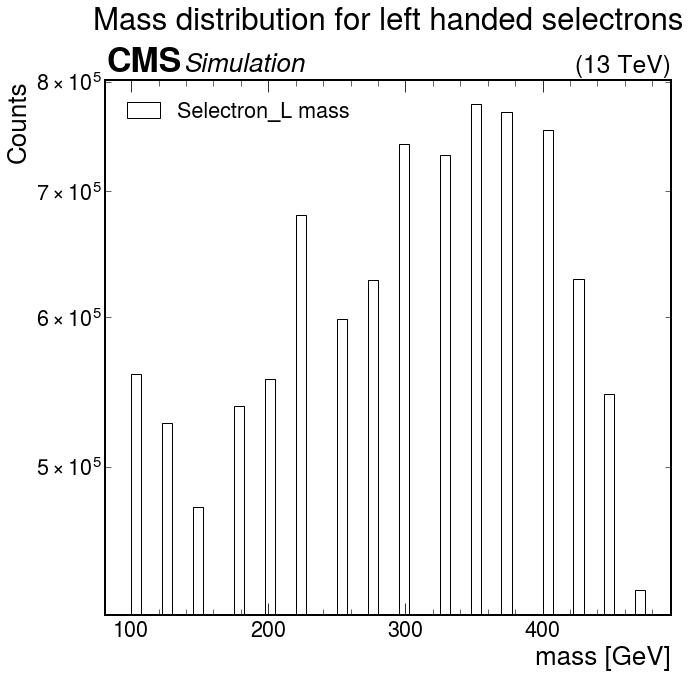

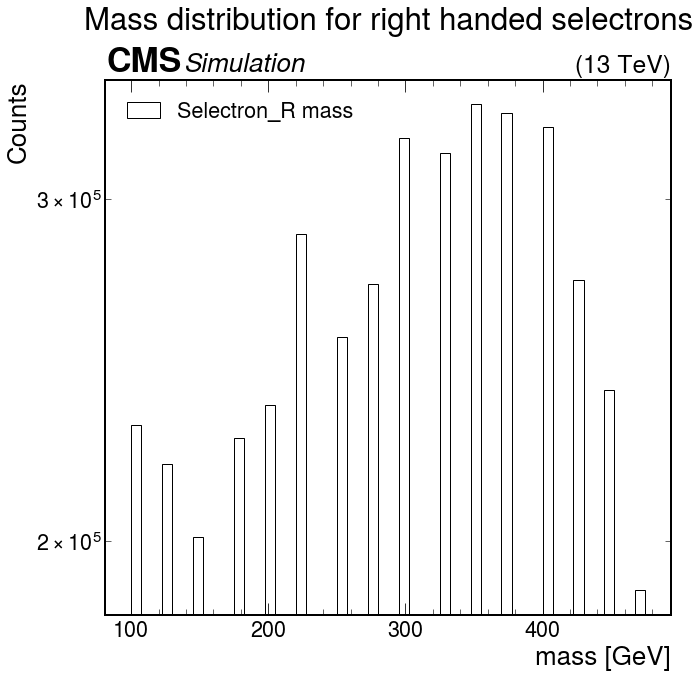

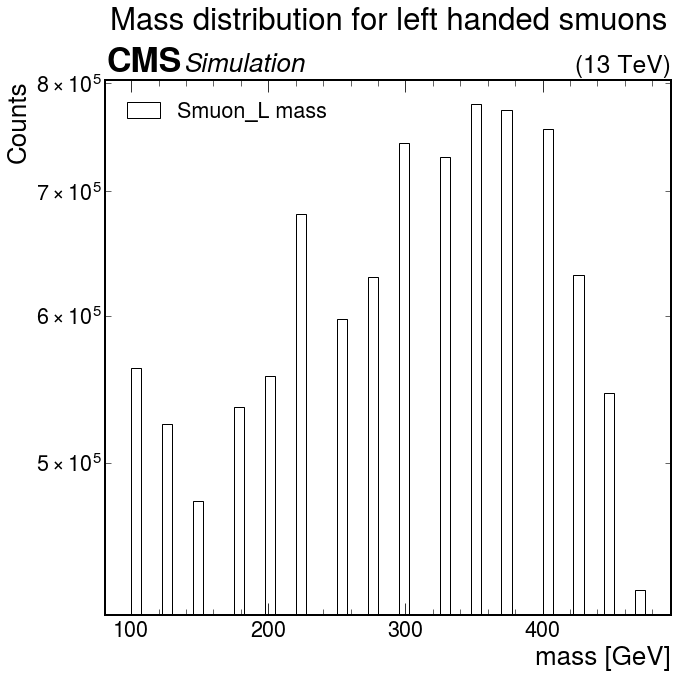

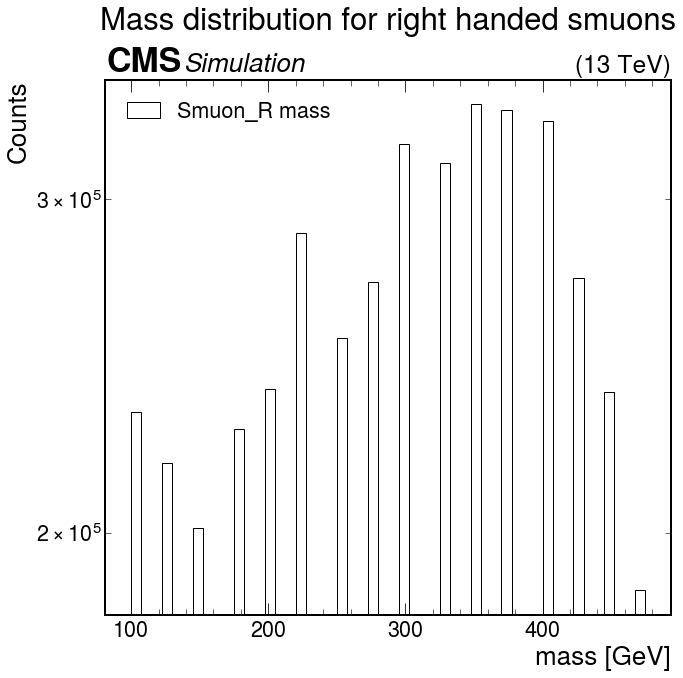

Unique mass points for Chi_0_1, lightest neutralino in TChiWZ MC
[  1.  25.  50.  60.  70.  75.  80.  85.  95. 100. 105. 110. 120. 125.
 130. 135. 145. 150. 155. 160. 170. 175. 180. 185. 195. 200. 205. 210.
 220. 225. 230. 235. 245. 250. 255. 260. 270. 275. 280. 285. 295. 300.
 305. 310. 320. 325. 330. 335. 345. 350. 355. 360. 370. 375. 380. 385.
 395. 400. 405. 410. 420. 425. 430. 435. 445. 455.]


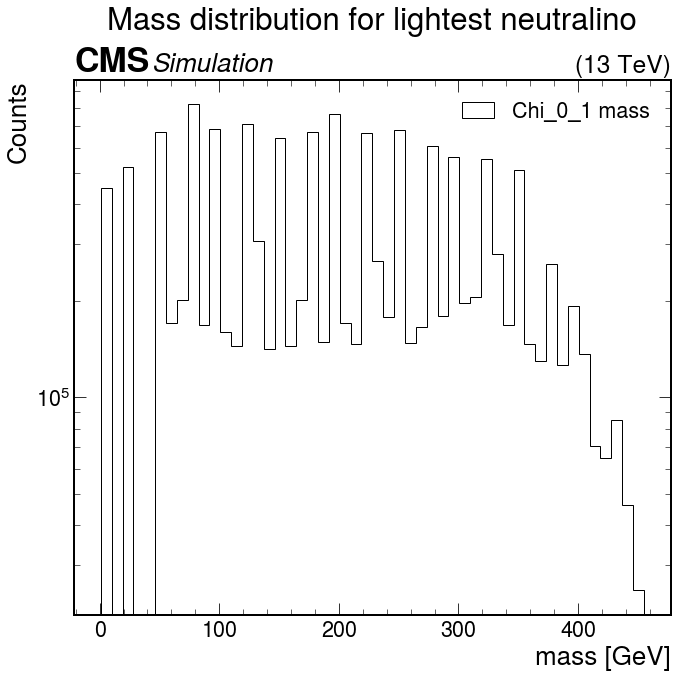

In [9]:
selectrons_L = genparts[(genparts.pdgId == 1000011)]

print("Unique mass points for left handed selectrons in TSlepSlep MC")
mass_distro_selectrons_L = ak.to_numpy(ak.flatten(selectrons_L.mass)) # Cast to numpy array after flatten
mass_distro_selectrons_L = np.unique(mass_distro_selectrons_L) # Reducing to unique values 
mass_distro_selectrons_L = np.sort(mass_distro_selectrons_L)
print(mass_distro_selectrons_L)


selectrons_R = genparts[(genparts.pdgId == 2000011)]

smuons_L = genparts[(genparts.pdgId == 1000013)]
smuons_R = genparts[(genparts.pdgId == 2000013)]

#print(chi_0_1_particles.pdgId)
#print(chi_0_1_particles.mass)
#print(chi_0_1_particles[:10].mass)

# Plot the left handed selectron mass distribution
plt.figure()
plt.hist(ak.to_numpy(ak.flatten(selectrons_L.mass)), bins=50, histtype='step', label="Selectron_L mass", color='black')
plt.xlabel("mass [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Mass distribution for left handed selectrons", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

# Plot the right handed selectron mass distribution
plt.figure()
plt.hist(ak.to_numpy(ak.flatten(selectrons_R.mass)), bins=50, histtype='step', label="Selectron_R mass", color='black')
plt.xlabel("mass [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Mass distribution for right handed selectrons", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

# Plot the left handed smuon mass distribution
plt.figure()
plt.hist(ak.to_numpy(ak.flatten(smuons_L.mass)), bins=50, histtype='step', label="Smuon_L mass", color='black')
plt.xlabel("mass [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Mass distribution for left handed smuons", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

# Plot the right handed smuon mass distribution
plt.figure()
plt.hist(ak.to_numpy(ak.flatten(smuons_R.mass)), bins=50, histtype='step', label="Smuon_R mass", color='black')
plt.xlabel("mass [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Mass distribution for right handed smuons", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()


chi_0_1_particles = genparts[(genparts.pdgId == 1000022)]

print("Unique mass points for Chi_0_1, lightest neutralino in TChiWZ MC")
mass_distro_chi_0 = ak.to_numpy(ak.flatten(chi_0_1_particles.mass)) # Cast to numpy array after flatten
mass_distro_chi_0 = np.unique(mass_distro_chi_0) # Reducing to unique values 
mass_distro_chi_0 = np.sort(mass_distro_chi_0)
print(mass_distro_chi_0)


# Plot the lightest neutralino mass distribution
plt.figure()
plt.hist(ak.to_numpy(ak.flatten(chi_0_1_particles.mass)), bins=50, histtype='step', label="Chi_0_1 mass", color='black')
plt.xlabel("mass [GeV]")
plt.ylabel("Counts")
plt.yscale('log')  # Set the y-axis to log scale
plt.title("Mass distribution for lightest neutralino", pad=50)  # Adjust title position with pad
mplhep.cms.label(loc=0)  # Move CMS label to a different position
plt.tight_layout()  # Ensure the layout adjusts automatically
plt.legend()
plt.show()

## Verify we have decent statistics at our mass points

we're interested in compressed mass states, so this is the difference between parent and child SUSY particles, i.e. 

For TChiWZ that would be $\tilde{χ}^0_2 = 300 GeV$ -> $\tilde{χ}^0_1 = 290 GeV$ and $\tilde{χ}^+_1 = 300 GeV$ -> $\tilde{χ}^0_1 = 290 GeV$

For TSlepSlep that would be $\tilde{e}^-_{L} = 300 GeV$ -> $\tilde{χ}^0_1 = 290 GeV$ and all other combinations of sleptons going to $\tilde{χ}^0_1$: 

$\tilde{e}^-_R$ -> $\tilde{χ}^0_1$

$\tilde{µ}^-_L$ -> $\tilde{χ}^0_1$

$\tilde{µ}^-_R$ -> $\tilde{χ}^0_1$

i.e. just make sure each of the parent SUSY particles exists at 300 GeV in these samples and the child particle (which is always LSP) exists at 290 GeV. Also count the events, we want a minimum of ~50k

In [10]:
events.fields

['SoftActivityJet',
 'Generator',
 'luminosityBlock',
 'LHEPdfWeight',
 'SV',
 'Jet',
 'L1Reco',
 'SoftActivityJetNjets2',
 'ChsMET',
 'genTtbarId',
 'Photon',
 'GenJetAK8',
 'GenJet',
 'GenIsolatedPhoton',
 'DeepMETResponseTune',
 'PSWeight',
 'SoftActivityJetHT',
 'GenVtx',
 'SoftActivityJetHT10',
 'Flag',
 'MET',
 'LowPtElectron',
 'GenModel',
 'SoftActivityJetNjets5',
 'SoftActivityJetNjets10',
 'IsoTrack',
 'PuppiMET',
 'SubJet',
 'fixedGridRhoFastjetCentral',
 'CaloMET',
 'SoftActivityJetHT5',
 'genWeight',
 'Tau',
 'L1simulation',
 'SoftActivityJetHT2',
 'FatJet',
 'RawMET',
 'fixedGridRhoFastjetCentralCalo',
 'fixedGridRhoFastjetAll',
 'TkMET',
 'SubGenJetAK8',
 'FsrPhoton',
 'GenVisTau',
 'GenDressedLepton',
 'LHEScaleWeight',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'Muon',
 'GenPart',
 'fixedGridRhoFastjetCentralNeutral',
 'run',
 'GenMET',
 'RawPuppiMET',
 'OtherPV',
 'PV',
 'CorrT1METJet',
 'Electron',
 'LHEWeight',
 'HTXS',
 'event',
 'Pileup',
 'DeepMETResolutionTune

In [11]:
#selectron_L_events = events.
genparts = events.GenPart
print(genparts.pdgId[-1])
print(ak.any(genparts.pdgId == 1000011, axis=1))
selectrons_L_events = events.GenPart[ak.any(genparts.pdgId == 1000011, axis=1)]
print(len(events.GenPart[ak.any(genparts.pdgId == 1000011, axis=1)]))
print(len(events))

[-2, 2, 1000013, -1000013, 21, 1000013, -1000013, ... 22, 22, 11, -11, 22, 11, -11]
[False, False, False, True, False, True, ... True, True, True, False, False, False]
1715814
4895839


In [12]:
genparts = events.GenPart

# Print the PdgId of the last particle in the array (for debugging)
print(genparts.pdgId[-1])

# Find events with left-handed selectrons (PdgID = 1000011)
selectrons_L_mask = ak.any(genparts.pdgId == 1000011, axis=1)

# Select only the events containing left-handed selectrons
selectrons_L_events = events[selectrons_L_mask]

# Optionally print the mask or selected events
print(selectrons_L_mask)
print(selectrons_L_events)


[-2, 2, 1000013, -1000013, 21, 1000013, -1000013, ... 22, 22, 11, -11, 22, 11, -11]
[False, False, False, True, False, True, ... True, True, True, False, False, False]
[<event 1:1335:2515931>, <event 1:1335:2515932>, ... <event 1:4508:8502086>]


In [13]:
from coffea.analysis_tools import PackedSelection

selection = PackedSelection()

selection.add("selectrons_L_300", ak.any(genparts.pdgId == 1000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("selectrons_R_300", ak.any(genparts.pdgId == 2000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_L_300", ak.any(genparts.pdgId == 1000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_R_300", ak.any(genparts.pdgId == 2000013, axis=1) & ak.any(genparts.mass == 300))



selectron_L_300_events = events[selection.all("selectrons_L_300")]
selectron_R_300_events = events[selection.all("selectrons_R_300")]
smuon_L_300_events = events[selection.all("smuons_L_300")]
smuon_R_300_events = events[selection.all("smuons_R_300")]

print(f"Total events in root file: {len(events)}")
print(f"Events with left handed selectrons at mass of 300 GeV: {len(selectron_L_300_events)}")
print(f"Events with right handed selectrons at mass of 300 GeV: {len(selectron_R_300_events)}")
print(f"Events with left handed smuons at mass of 300 GeV: {len(smuon_L_300_events)}")
print(f"Events with right handed smuons at mass of 300 GeV: {len(smuon_R_300_events)}")
print("note: the above event counts are just sleptons at those mass values, below I will add condition for Chi0 mass")



Total events in root file: 4895839
Events with left handed selectrons at mass of 300 GeV: 1715814
Events with right handed selectrons at mass of 300 GeV: 732330
Events with left handed smuons at mass of 300 GeV: 1714898
Events with right handed smuons at mass of 300 GeV: 732797
note: the above event counts are just sleptons at those mass values, below I will add condition for Chi0 mass


In [14]:
from coffea.analysis_tools import PackedSelection

selection = PackedSelection()

selection.add("selectrons_L_300", ak.any(genparts.pdgId == 1000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("selectrons_R_300", ak.any(genparts.pdgId == 2000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_L_300", ak.any(genparts.pdgId == 1000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_R_300", ak.any(genparts.pdgId == 2000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("Chi_0_290", ak.any(genparts.pdgId == 1000022, axis=1) & ak.any(genparts.mass == 290))



selectron_L_300_LSP_290_events = events[selection.all("selectrons_L_300", "Chi_0_290")]
selectron_R_300_LSP_290_events = events[selection.all("selectrons_R_300", "Chi_0_290")]
smuon_L_300_LSP_290_events = events[selection.all("smuons_L_300", "Chi_0_290")]
smuon_R_300_LSP_290_events = events[selection.all("smuons_R_300", "Chi_0_290")]


print(f"Events with left handed selectrons at mass of 300 GeV and LSP 290: {len(selectron_L_300_LSP_290_events)}")
print(f"Events with right handed selectrons at mass of 300 GeV and LSP 290: {len(selectron_R_300_LSP_290_events)}")
print(f"Events with left handed smuons at mass of 300 GeV and LSP 290: {len(smuon_L_300_LSP_290_events)}")
print(f"Events with right handed smuons at mass of 300 GeV and LSP 290: {len(smuon_R_300_LSP_290_events)}")




Events with left handed selectrons at mass of 300 GeV and LSP 290: 0
Events with right handed selectrons at mass of 300 GeV and LSP 290: 0
Events with left handed smuons at mass of 300 GeV and LSP 290: 0
Events with right handed smuons at mass of 300 GeV and LSP 290: 0


In [15]:
chi_0_1_particles = genparts[(genparts.pdgId == 1000022)]

print("Unique mass points for Chi_0_1, lightest neutralino in TSlepSlep MC")
mass_distro_chi_0 = ak.to_numpy(ak.flatten(chi_0_1_particles.mass)) # Cast to numpy array after flatten
mass_distro_chi_0 = np.unique(mass_distro_chi_0) # Reducing to unique values 
mass_distro_chi_0 = np.sort(mass_distro_chi_0)
print(mass_distro_chi_0)

Unique mass points for Chi_0_1, lightest neutralino in TSlepSlep MC
[  1.  25.  50.  60.  70.  75.  80.  85.  95. 100. 105. 110. 120. 125.
 130. 135. 145. 150. 155. 160. 170. 175. 180. 185. 195. 200. 205. 210.
 220. 225. 230. 235. 245. 250. 255. 260. 270. 275. 280. 285. 295. 300.
 305. 310. 320. 325. 330. 335. 345. 350. 355. 360. 370. 375. 380. 385.
 395. 400. 405. 410. 420. 425. 430. 435. 445. 455.]


In [16]:
from coffea.analysis_tools import PackedSelection

selection = PackedSelection()

selection.add("selectrons_L_300", ak.any(genparts.pdgId == 1000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("selectrons_R_300", ak.any(genparts.pdgId == 2000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_L_300", ak.any(genparts.pdgId == 1000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_R_300", ak.any(genparts.pdgId == 2000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("Chi_0_295", ak.any(genparts.pdgId == 1000022, axis=1) & ak.any(genparts.mass == 295))



selectron_L_300_LSP_295_events = events[selection.all("selectrons_L_300", "Chi_0_295")]
selectron_R_300_LSP_295_events = events[selection.all("selectrons_R_300", "Chi_0_295")]
smuon_L_300_LSP_295_events = events[selection.all("smuons_L_300", "Chi_0_295")]
smuon_R_300_LSP_295_events = events[selection.all("smuons_R_300", "Chi_0_295")]


print(f"Events with left handed selectrons at mass of 300 GeV and LSP 295: {len(selectron_L_300_LSP_295_events)}")
print(f"Events with right handed selectrons at mass of 300 GeV and LSP 295: {len(selectron_R_300_LSP_295_events)}")
print(f"Events with left handed smuons at mass of 300 GeV and LSP 295: {len(smuon_L_300_LSP_295_events)}")
print(f"Events with right handed smuons at mass of 300 GeV and LSP 295: {len(smuon_R_300_LSP_295_events)}")




Events with left handed selectrons at mass of 300 GeV and LSP 295: 1715814
Events with right handed selectrons at mass of 300 GeV and LSP 295: 732330
Events with left handed smuons at mass of 300 GeV and LSP 295: 1714898
Events with right handed smuons at mass of 300 GeV and LSP 295: 732797


In [17]:
from coffea.analysis_tools import PackedSelection

selection = PackedSelection()

selection.add("selectrons_L_300", ak.any(genparts.pdgId == 1000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("selectrons_R_300", ak.any(genparts.pdgId == 2000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_L_300", ak.any(genparts.pdgId == 1000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_R_300", ak.any(genparts.pdgId == 2000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("Chi_0_285", ak.any(genparts.pdgId == 1000022, axis=1) & ak.any(genparts.mass == 285))



selectron_L_300_LSP_285_events = events[selection.all("selectrons_L_300", "Chi_0_285")]
selectron_R_300_LSP_285_events = events[selection.all("selectrons_R_300", "Chi_0_285")]
smuon_L_300_LSP_285_events = events[selection.all("smuons_L_300", "Chi_0_285")]
smuon_R_300_LSP_285_events = events[selection.all("smuons_R_300", "Chi_0_285")]


print(f"Events with left handed selectrons at mass of 300 GeV and LSP 285: {len(selectron_L_300_LSP_285_events)}")
print(f"Events with right handed selectrons at mass of 300 GeV and LSP 285: {len(selectron_R_300_LSP_285_events)}")
print(f"Events with left handed smuons at mass of 300 GeV and LSP 285: {len(smuon_L_300_LSP_285_events)}")
print(f"Events with right handed smuons at mass of 300 GeV and LSP 285: {len(smuon_R_300_LSP_285_events)}")

print(f"total number of events: {len(events)}")

Events with left handed selectrons at mass of 300 GeV and LSP 285: 1715814
Events with right handed selectrons at mass of 300 GeV and LSP 285: 732330
Events with left handed smuons at mass of 300 GeV and LSP 285: 1714898
Events with right handed smuons at mass of 300 GeV and LSP 285: 732797
total number of events: 4895839


In [18]:
from coffea.analysis_tools import PackedSelection

selection = PackedSelection()

selection.add("selectrons_L_300", ak.any(genparts.pdgId == 1000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("selectrons_R_300", ak.any(genparts.pdgId == 2000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_L_300", ak.any(genparts.pdgId == 1000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_R_300", ak.any(genparts.pdgId == 2000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("Chi_0_275", ak.any(genparts.pdgId == 1000022, axis=1) & ak.any(genparts.mass == 275))



selectron_L_300_LSP_275_events = events[selection.all("selectrons_L_300", "Chi_0_275")]
selectron_R_300_LSP_275_events = events[selection.all("selectrons_R_300", "Chi_0_275")]
smuon_L_300_LSP_275_events = events[selection.all("smuons_L_300", "Chi_0_275")]
smuon_R_300_LSP_275_events = events[selection.all("smuons_R_300", "Chi_0_275")]


print(f"Events with left handed selectrons at mass of 300 GeV and LSP 275: {len(selectron_L_300_LSP_275_events)}")
print(f"Events with right handed selectrons at mass of 300 GeV and LSP 275: {len(selectron_R_300_LSP_275_events)}")
print(f"Events with left handed smuons at mass of 300 GeV and LSP 275: {len(smuon_L_300_LSP_275_events)}")
print(f"Events with right handed smuons at mass of 300 GeV and LSP 275: {len(smuon_R_300_LSP_275_events)}")

print(f"total number of events: {len(events)}")

Events with left handed selectrons at mass of 300 GeV and LSP 275: 1715814
Events with right handed selectrons at mass of 300 GeV and LSP 275: 732330
Events with left handed smuons at mass of 300 GeV and LSP 275: 1714898
Events with right handed smuons at mass of 300 GeV and LSP 275: 732797
total number of events: 4895839


In [19]:
from coffea.analysis_tools import PackedSelection

selection = PackedSelection()

selection.add("selectrons_L_300", ak.any(genparts.pdgId == 1000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("selectrons_R_300", ak.any(genparts.pdgId == 2000011, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_L_300", ak.any(genparts.pdgId == 1000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("smuons_R_300", ak.any(genparts.pdgId == 2000013, axis=1) & ak.any(genparts.mass == 300))
selection.add("Chi_0_275", ak.any(genparts.pdgId == 1000022, axis=1) & ak.any(genparts.mass == 275))



selectron_L_300_LSP_275_events = events[selection.all("selectrons_L_300", "Chi_0_275")]
selectron_R_300_LSP_275_events = events[selection.all("selectrons_R_300", "Chi_0_275")]
smuon_L_300_LSP_275_events = events[selection.all("smuons_L_300", "Chi_0_275")]
smuon_R_300_LSP_275_events = events[selection.all("smuons_R_300", "Chi_0_275")]


print(f"Events with left handed selectrons at mass of 300 GeV and LSP 275: {len(selectron_L_300_LSP_275_events)}")
print(f"Events with right handed selectrons at mass of 300 GeV and LSP 275: {len(selectron_R_300_LSP_275_events)}")
print(f"Events with left handed smuons at mass of 300 GeV and LSP 275: {len(smuon_L_300_LSP_275_events)}")
print(f"Events with right handed smuons at mass of 300 GeV and LSP 275: {len(smuon_R_300_LSP_275_events)}")

print(f"total number of events: {len(events)}")

Events with left handed selectrons at mass of 300 GeV and LSP 275: 1715814
Events with right handed selectrons at mass of 300 GeV and LSP 275: 732330
Events with left handed smuons at mass of 300 GeV and LSP 275: 1714898
Events with right handed smuons at mass of 300 GeV and LSP 275: 732797
total number of events: 4895839


In [20]:
#selectron_L_300_LSP_275_events[ak.num()]
print(np.sum(ak.num(selectron_L_300_LSP_275_events.LowPtElectron[(selectron_L_300_LSP_275_events.LowPtElectron.pt <=5) & (selectron_L_300_LSP_275_events.LowPtElectron.pt > 1) & (selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1)], axis=1)))
#print(len(selectron_L_300_LSP_275_events.LowPtElectron[(selectron_L_300_LSP_275_events.LowPtElectron.pt <=5) & (selectron_L_300_LSP_275_events.LowPtElectron.pt > 1) & (selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1)], axis=1))



30348


For 1<pt<=5 make 1D histogram of embeddedID, ID, then make 2D histogram of both

In [21]:
# Step 1: Grab low pt electron collection from our selected events at mass points 300 and 275
lpt_e = selectron_L_300_LSP_275_events.LowPtElectron

# Step 2: Initialize PackedSelection
LowPtElectron_selection = PackedSelection()

# Step 3: Create a mask for events containing at least one low pt electron that meets the criteria
LowPtElectron_selection.add("lpt_e selection", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1), axis=1))
LowPtElectron_selection.add("lpt_e pt", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1), axis=1))

# Step 4: Apply the event-level selection mask to the events and extract the low pt electrons
selected_events = selectron_L_300_LSP_275_events[LowPtElectron_selection.all("lpt_e selection")]

print(f"number of events after mass selection: {len(selectron_L_300_LSP_275_events)}")
print(f"number of events with at least one passing lowpte: {len(selected_events)}")
# Step 5: Now, filter the low pt electrons within those selected events to include only those that pass the criteria
selected_lpt_e = selected_events.LowPtElectron[(selected_events.LowPtElectron.pt <= 5) & (selected_events.LowPtElectron.pt > 1) & (selected_events.LowPtElectron.genPartFlav == 1)]

# Step 6: Count the number of selected electrons
print(f"number of events after pt cut: {len(selectron_L_300_LSP_275_events[LowPtElectron_selection.all('lpt_e pt')])}")
print(f"number of LowPtElectrons across all events that pass: {np.sum(ak.num(selected_lpt_e))}")


number of events after mass selection: 1715814
number of events with at least one passing lowpte: 29691
number of events after pt cut: 180707
number of LowPtElectrons across all events that pass: 30348


In [22]:
# Step 1: Grab low pt electron collection from our selected events at mass points 300 and 275
lpt_e = selectron_L_300_LSP_275_events.LowPtElectron

# Step 2: Create a mask for the low pt electrons that meet the criteria
electron_mask = (lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1)

# Step 3: Create a mask at the event level to select events that contain at least one low pt electron passing the criteria
event_mask = ak.any(electron_mask, axis=1)

# Step 4: Apply the event-level mask to the events and extract the low pt electrons
selected_events = selectron_L_300_LSP_275_events[event_mask]

# Step 5: Now, filter the low pt electrons within those selected events to include only those that pass the criteria
selected_lpt_e = selected_events.LowPtElectron[electron_mask[event_mask]]

# Step 6: Count the number of selected electrons
print(np.sum(ak.num(selected_lpt_e)))


30348


In [23]:
events.LowPtElectron.fields

['ID',
 'convVtxRadius',
 'deltaEtaSC',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eInvMinusPInv',
 'embeddedID',
 'energyErr',
 'eta',
 'hoe',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'phi',
 'pt',
 'ptbiased',
 'r9',
 'scEtOverPt',
 'sieie',
 'unbiased',
 'charge',
 'convWP',
 'pdgId',
 'convVeto',
 'lostHits',
 'genPartIdx',
 'genPartFlav',
 'genPartIdxG']

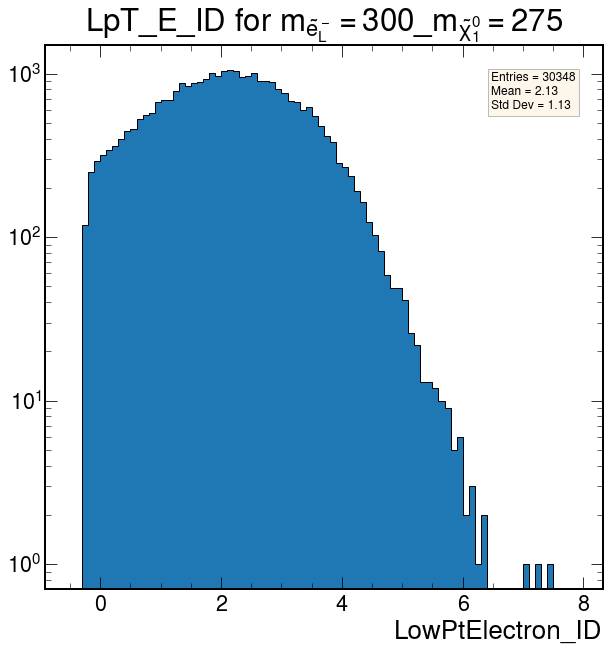

In [24]:
fig, ax = plt.subplots()
ax.set_xlabel("LowPtElectron_ID")
ax.set_title(r"LpT_E_ID for $m_{\tilde{e}^-_L}=300\_m_{\tilde{χ}^0_1}=275$")
ax.set_yscale('log')
flattened_IDs = ak.flatten(selected_lpt_e.ID)

#_____________________________
#stats box to imitate root's:
mean = np.mean(flattened_IDs)
std_dev = np.std(flattened_IDs)
entries = len(flattened_IDs)
stats_text = f"Entries = {entries}\nMean = {mean:.2f}\nStd Dev = {std_dev:.2f}"
props = dict(boxstyle='square', facecolor='wheat', alpha=0.25)
ax.text(0.80, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
#end stats box code
#-----------------------------


bin_edges = np.arange(-0.5, 8, 0.1)

#ax.hist(filtered_counts, bins=np.linspace(0, 5, 6))  # bins from 1 to 4
ax.hist(flattened_IDs, bins=bin_edges, histtype='stepfilled', edgecolor='black')
plt.show()

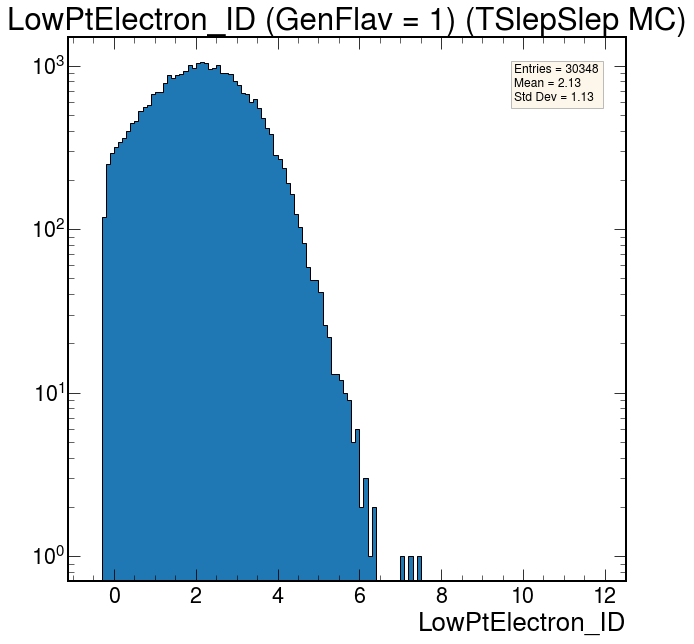

In [25]:
fig, ax = plt.subplots()
ax.set_xlabel("LowPtElectron_ID")
ax.set_title("LowPtElectron_ID (GenFlav = 1) (TSlepSlep MC)")
ax.set_yscale('log')
flattened_IDs = ak.flatten(selected_lpt_e.ID)

#_____________________________
#stats box to imitate root's:
mean = np.mean(flattened_IDs)
std_dev = np.std(flattened_IDs)
entries = len(flattened_IDs)
stats_text = f"Entries = {entries}\nMean = {mean:.2f}\nStd Dev = {std_dev:.2f}"
props = dict(boxstyle='square', facecolor='wheat', alpha=0.25)
ax.text(0.80, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
#end stats box code
#-----------------------------


bin_edges = np.arange(-0.5, 12, 0.1)

#ax.hist(filtered_counts, bins=np.linspace(0, 5, 6))  # bins from 1 to 4
ax.hist(flattened_IDs, bins=bin_edges, histtype='stepfilled', edgecolor='black')
plt.show()

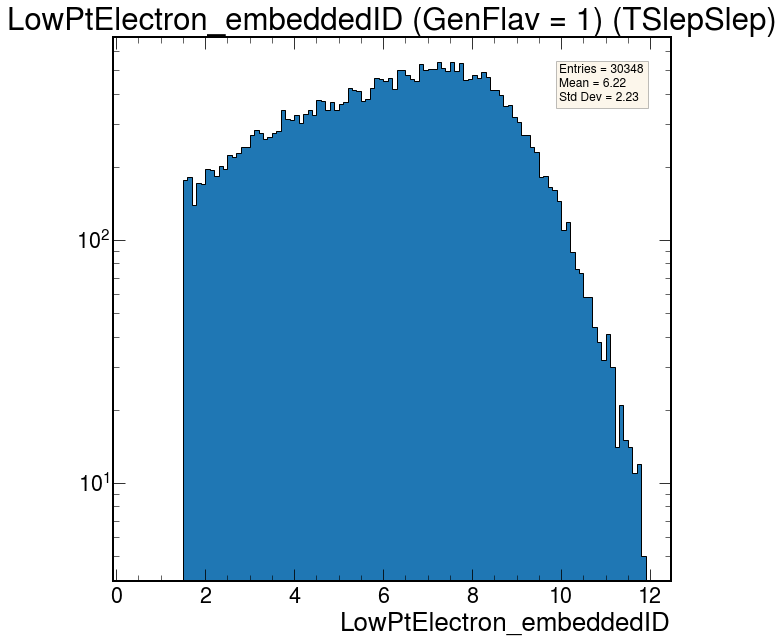

In [26]:
fig, ax = plt.subplots()
ax.set_xlabel("LowPtElectron_embeddedID")
ax.set_title("LowPtElectron_embeddedID (GenFlav = 1) (TSlepSlep)")
ax.set_yscale('log')
flattened_eIDs = ak.flatten(selected_lpt_e.embeddedID)

#_____________________________
#stats box to imitate root's:
mean = np.mean(flattened_eIDs)
std_dev = np.std(flattened_eIDs)
entries = len(flattened_eIDs)
stats_text = f"Entries = {entries}\nMean = {mean:.2f}\nStd Dev = {std_dev:.2f}"
props = dict(boxstyle='square', facecolor='wheat', alpha=0.25)
ax.text(0.8, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
#end stats box code
#-----------------------------


bin_edges = np.arange(0.5, 12, 0.1)

#ax.hist(filtered_counts, bins=np.linspace(0, 5, 6))  # bins from 1 to 4
ax.hist(flattened_eIDs, bins=bin_edges, histtype='stepfilled', edgecolor='black')
plt.show()

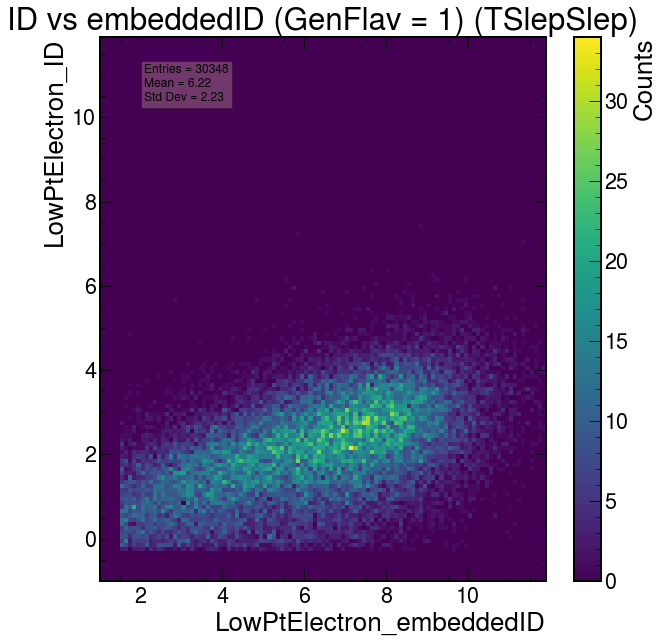

In [27]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

# Flatten the jagged arrays into 1D arrays
flattened_eIDs = ak.flatten(selected_lpt_e.embeddedID)
flattened_IDs = ak.flatten(selected_lpt_e.ID)

# Plotting
fig, ax = plt.subplots()
ax.set_xlabel("LowPtElectron_embeddedID")
ax.set_ylabel("LowPtElectron_ID")
ax.set_title("ID vs embeddedID (GenFlav = 1) (TSlepSlep)")

# 2D Histogram
h2d = ax.hist2d(flattened_eIDs, flattened_IDs, bins=[np.arange(1, 12, 0.1), np.arange(-1, 12, 0.1)], cmap='viridis')

# Adding a colorbar
cbar = plt.colorbar(h2d[3], ax=ax)
cbar.set_label('Counts')
ax.text(0.1, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)

plt.show()

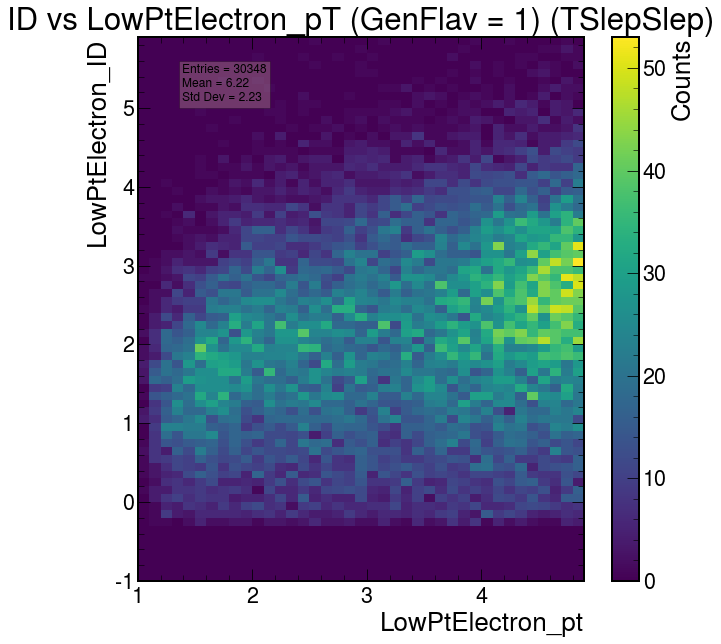

In [28]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

# Flatten the jagged arrays into 1D arrays
flattened_eIDs = ak.flatten(selected_lpt_e.embeddedID)
flattened_IDs = ak.flatten(selected_lpt_e.ID)

# Plotting
fig, ax = plt.subplots()
ax.set_xlabel("LowPtElectron_pt")
ax.set_ylabel("LowPtElectron_ID")
ax.set_title("ID vs LowPtElectron_pT (GenFlav = 1) (TSlepSlep)")

# 2D Histogram
h2d = ax.hist2d(ak.flatten(selected_lpt_e.pt), flattened_IDs, bins=[np.arange(1, 5, 0.1), np.arange(-1, 6, 0.1)], cmap='viridis')

# Adding a colorbar
cbar = plt.colorbar(h2d[3], ax=ax)
cbar.set_label('Counts')
ax.text(0.1, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)

plt.show()

# Plots below are for GenPartFlav == 0

In [29]:
# Step 1: Grab low pt electron collection from our selected events at mass points 300 and 275
#lpt_e = selectron_L_300_LSP_275_events.LowPtElectron

# Step 2: Create a mask for the low pt electrons that meet the criteria
electron_mask_flav0 = (lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0)

# Step 3: Create a mask at the event level to select events that contain at least one low pt electron passing the criteria
event_mask_flav0 = ak.any(electron_mask_flav0, axis=1)

# Step 4: Apply the event-level mask to the events and extract the low pt electrons
selected_events_flav0 = selectron_L_300_LSP_275_events[event_mask_flav0]

# Step 5: Now, filter the low pt electrons within those selected events to include only those that pass the criteria
selected_lpt_e_flav0 = selected_events_flav0.LowPtElectron[electron_mask_flav0[event_mask_flav0]]

# Step 6: Count the number of selected electrons
print(np.sum(ak.num(selected_lpt_e_flav0)))
print(len(selected_events_flav0))


148726
137553


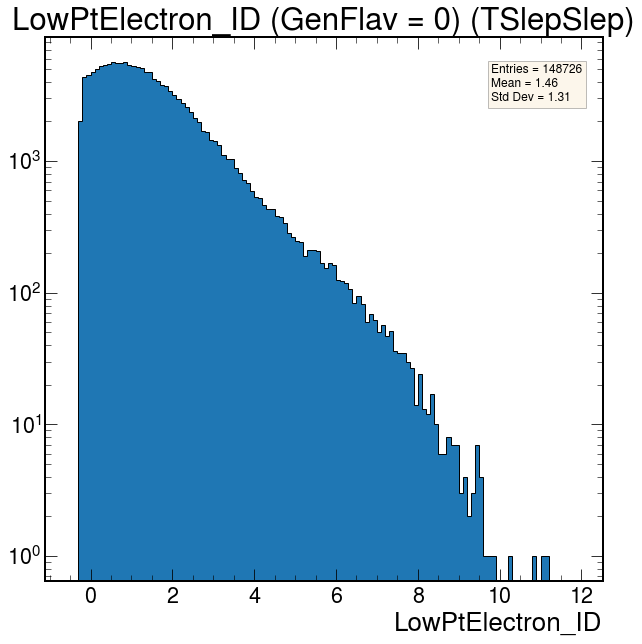

In [30]:
fig, ax = plt.subplots()
ax.set_xlabel("LowPtElectron_ID")
ax.set_title("LowPtElectron_ID (GenFlav = 0) (TSlepSlep)")
ax.set_yscale('log')
flattened_IDs = ak.flatten(selected_lpt_e_flav0.ID)

#_____________________________
#stats box to imitate root's:
mean = np.mean(flattened_IDs)
std_dev = np.std(flattened_IDs)
entries = len(flattened_IDs)
stats_text = f"Entries = {entries}\nMean = {mean:.2f}\nStd Dev = {std_dev:.2f}"
props = dict(boxstyle='square', facecolor='wheat', alpha=0.25)
ax.text(0.80, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
#end stats box code
#-----------------------------


bin_edges = np.arange(-0.5, 12, 0.1)

#ax.hist(filtered_counts, bins=np.linspace(0, 5, 6))  # bins from 1 to 4
ax.hist(flattened_IDs, bins=bin_edges, histtype='stepfilled', edgecolor='black')
plt.show()

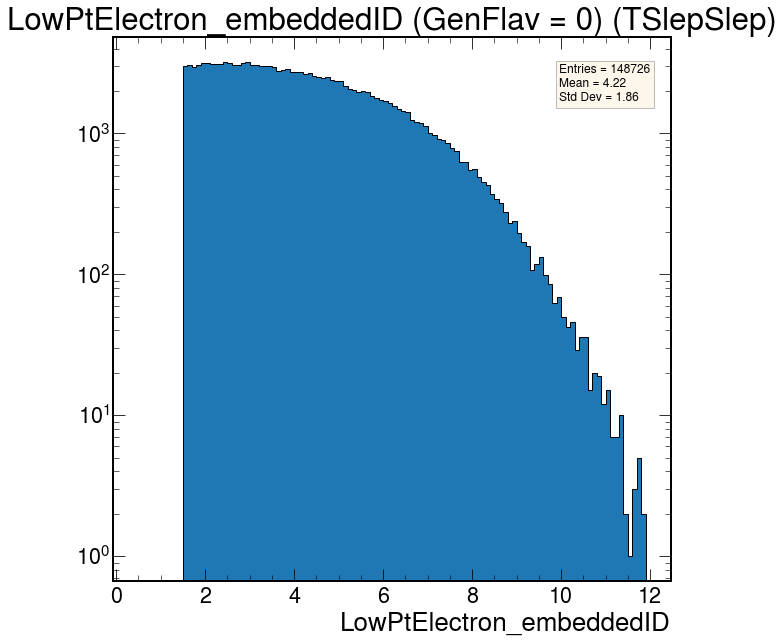

In [31]:
fig, ax = plt.subplots()
ax.set_xlabel("LowPtElectron_embeddedID")
ax.set_title("LowPtElectron_embeddedID (GenFlav = 0) (TSlepSlep)")
ax.set_yscale('log')
flattened_eIDs = ak.flatten(selected_lpt_e_flav0.embeddedID)

#_____________________________
#stats box to imitate root's:
mean = np.mean(flattened_eIDs)
std_dev = np.std(flattened_eIDs)
entries = len(flattened_eIDs)
stats_text = f"Entries = {entries}\nMean = {mean:.2f}\nStd Dev = {std_dev:.2f}"
props = dict(boxstyle='square', facecolor='wheat', alpha=0.25)
ax.text(0.8, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
#end stats box code
#-----------------------------


bin_edges = np.arange(0.5, 12, 0.1)

#ax.hist(filtered_counts, bins=np.linspace(0, 5, 6))  # bins from 1 to 4
ax.hist(flattened_eIDs, bins=bin_edges, histtype='stepfilled', edgecolor='black')
plt.show()

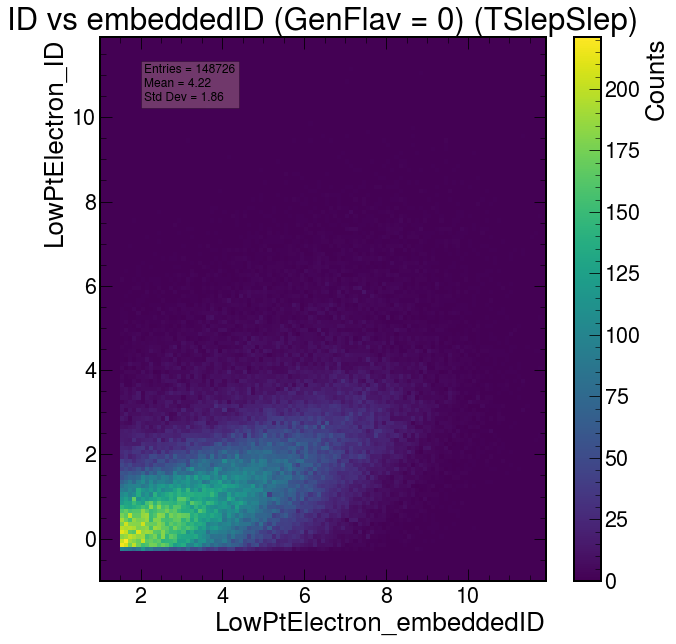

In [32]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

# Flatten the jagged arrays into 1D arrays
flattened_eIDs = ak.flatten(selected_lpt_e_flav0.embeddedID)
flattened_IDs = ak.flatten(selected_lpt_e_flav0.ID)

# Plotting
fig, ax = plt.subplots()
ax.set_xlabel("LowPtElectron_embeddedID")
ax.set_ylabel("LowPtElectron_ID")
ax.set_title("ID vs embeddedID (GenFlav = 0) (TSlepSlep)")

# 2D Histogram
h2d = ax.hist2d(flattened_eIDs, flattened_IDs, bins=[np.arange(1, 12, 0.1), np.arange(-1, 12, 0.1)], cmap='viridis')

# Adding a colorbar
cbar = plt.colorbar(h2d[3], ax=ax)
cbar.set_label('Counts')
ax.text(0.1, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)

plt.show()

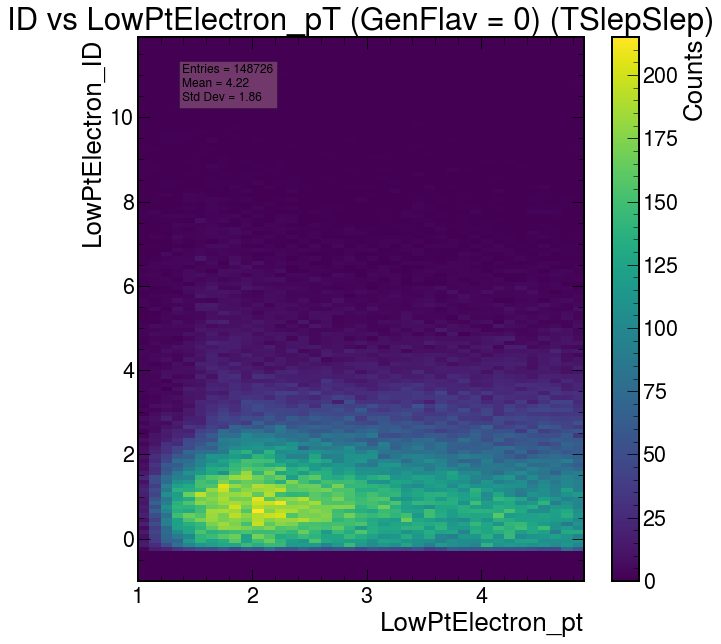

In [33]:
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

# Flatten the jagged arrays into 1D arrays
flattened_eIDs = ak.flatten(selected_lpt_e_flav0.embeddedID)
flattened_IDs = ak.flatten(selected_lpt_e_flav0.ID)

# Plotting
fig, ax = plt.subplots()
ax.set_xlabel("LowPtElectron_pt")
ax.set_ylabel("LowPtElectron_ID")
ax.set_title("ID vs LowPtElectron_pT (GenFlav = 0) (TSlepSlep)")

#_____________________________
#stats box to imitate root's:
mean = np.mean(flattened_eIDs)
std_dev = np.std(flattened_eIDs)
entries = len(flattened_eIDs)
stats_text = f"Entries = {entries}\nMean = {mean:.2f}\nStd Dev = {std_dev:.2f}"
props = dict(boxstyle='square', facecolor='wheat', alpha=0.25)
ax.text(0.1, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)
#end stats box code
#-----------------------------

# 2D Histogram
h2d = ax.hist2d(ak.flatten(selected_lpt_e_flav0.pt), flattened_IDs, bins=[np.arange(1, 5, 0.1), np.arange(-1, 12, 0.1)], cmap='viridis')

# Adding a colorbar
cbar = plt.colorbar(h2d[3], ax=ax)
cbar.set_label('Counts')
#ax.text(0.1, 0.95, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)

plt.show()

In [34]:

LowPtElectron_selection.add("lpt_e selection_flav1_ID1.0", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.0), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID1.1", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.1), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID1.2", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.2), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID1.3", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.3), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID1.4", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.4), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID1.5", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.5), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID1.6", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.6), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID1.7", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.7), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID1.8", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.8), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID1.9", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 1.9), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_ID2.0", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.ID >= 2.0), axis=1))


In [35]:
print("TSlepSlep")
print(f"event count with ID >= 1.0: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.0')])}")
print(f"event count with ID >= 1.1: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.1')])}")
print(f"event count with ID >= 1.2: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.2')])}")
print(f"event count with ID >= 1.3: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.3')])}")
print(f"event count with ID >= 1.4: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.4')])}")
print(f"event count with ID >= 1.5: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.5')])}")
print(f"event count with ID >= 1.6: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.6')])}")
print(f"event count with ID >= 1.7: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.7')])}")
print(f"event count with ID >= 1.8: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.8')])}")
print(f"event count with ID >= 1.9: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID1.9')])}")
print(f"event count with ID >= 2.0: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_ID2.0')])}")

TSlepSlep
event count with ID >= 1.0: 24615
event count with ID >= 1.1: 23950
event count with ID >= 1.2: 23271
event count with ID >= 1.3: 22506
event count with ID >= 1.4: 21655
event count with ID >= 1.5: 20840
event count with ID >= 1.6: 20000
event count with ID >= 1.7: 19129
event count with ID >= 1.8: 18226
event count with ID >= 1.9: 17240
event count with ID >= 2.0: 16284


In [36]:

LowPtElectron_selection.add("lpt_e selection_flav1_eID4.0", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.0), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID4.1", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.1), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID4.2", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.2), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID4.3", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.3), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID4.4", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.4), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID4.5", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.5), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID4.6", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.6), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID4.7", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.7), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID4.8", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.8), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID4.9", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 4.9), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1_eID5.0", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1) & (lpt_e.embeddedID >= 5.0), axis=1))


In [37]:
print("TSlepSlep")
print(f"event count with embeddedID >= 4.0: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.0')])}")
print(f"event count with embeddedID >= 4.1: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.1')])}")
print(f"event count with embeddedID >= 4.2: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.2')])}")
print(f"event count with embeddedID >= 4.3: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.3')])}")
print(f"event count with embeddedID >= 4.4: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.4')])}")
print(f"event count with embeddedID >= 4.5: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.5')])}")
print(f"event count with embeddedID >= 4.6: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.6')])}")
print(f"event count with embeddedID >= 4.7: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.7')])}")
print(f"event count with embeddedID >= 4.8: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.8')])}")
print(f"event count with embeddedID >= 4.9: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID4.9')])}")
print(f"event count with embeddedID >= 5.0: {len(events[LowPtElectron_selection.all('lpt_e selection_flav1_eID5.0')])}")

TSlepSlep
event count with embeddedID >= 4.0: 24117
event count with embeddedID >= 4.1: 23799
event count with embeddedID >= 4.2: 23502
event count with embeddedID >= 4.3: 23181
event count with embeddedID >= 4.4: 22847
event count with embeddedID >= 4.5: 22530
event count with embeddedID >= 4.6: 22166
event count with embeddedID >= 4.7: 21808
event count with embeddedID >= 4.8: 21471
event count with embeddedID >= 4.9: 21119
event count with embeddedID >= 5.0: 20793


In [38]:

new_selection = PackedSelection()

#new_selection.add("lpt_e mega selection", ak.any((events.LowPtElectron.genPartFlav == 1) & (events.LowPtElectron.pt < 1) & (events.LowPtElectron.pt <= 5) & (np.abs(events.LowPtElectron.eta) < 2.4) & (np.abs(events.LowPtElectron.dxy) < 0.05) & (np.abs(events.LowPtElectron.dz) < 0.1) & (events.LowPtElectron.miniPFRelIso_all < (20 + 300/events.LowPtElectron.pt)), axis=1))


In [39]:
#lpt_sel_events = events[new_selection.all("lpt_e mega selection")]
#print(len(lpt_sel_events))

In [40]:
new_selection.add("lpt_e mega selection", ak.any((selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt >= 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt < 5), axis=1))


In [41]:
lpt_sel_events = selectron_L_300_LSP_275_events[new_selection.all("lpt_e mega selection")]
print(len(lpt_sel_events))

29691


In [42]:

new_selection.add("lpt_e 1to2 selection", ak.any((selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt >= 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt < 2) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.eta) < 2.4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dxy) < 0.05) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dz) < 0.1) & (selectron_L_300_LSP_275_events.LowPtElectron.miniPFRelIso_all < (20 + 300/selectron_L_300_LSP_275_events.LowPtElectron.pt)), axis=1))
new_selection.add("lpt_e 2to3 selection", ak.any((selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt >= 2) & (selectron_L_300_LSP_275_events.LowPtElectron.pt < 3) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.eta) < 2.4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dxy) < 0.05) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dz) < 0.1) & (selectron_L_300_LSP_275_events.LowPtElectron.miniPFRelIso_all < (20 + 300/selectron_L_300_LSP_275_events.LowPtElectron.pt)), axis=1))
new_selection.add("lpt_e 3to4 selection", ak.any((selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt >= 3) & (selectron_L_300_LSP_275_events.LowPtElectron.pt < 4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.eta) < 2.4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dxy) < 0.05) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dz) < 0.1) & (selectron_L_300_LSP_275_events.LowPtElectron.miniPFRelIso_all < (20 + 300/selectron_L_300_LSP_275_events.LowPtElectron.pt)), axis=1))
new_selection.add("lpt_e 4to5 selection", ak.any((selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt >= 4) & (selectron_L_300_LSP_275_events.LowPtElectron.pt < 5) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.eta) < 2.4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dxy) < 0.05) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dz) < 0.1) & (selectron_L_300_LSP_275_events.LowPtElectron.miniPFRelIso_all < (20 + 300/selectron_L_300_LSP_275_events.LowPtElectron.pt)), axis=1))


In [43]:
lpt_sel_events = selectron_L_300_LSP_275_events[new_selection.all("lpt_e 1to2 selection")]
print(len(lpt_sel_events))
lpt_sel_events = selectron_L_300_LSP_275_events[new_selection.all("lpt_e 2to3 selection")]
print(len(lpt_sel_events))
lpt_sel_events = selectron_L_300_LSP_275_events[new_selection.all("lpt_e 3to4 selection")]
print(len(lpt_sel_events))
lpt_sel_events = selectron_L_300_LSP_275_events[new_selection.all("lpt_e 4to5 selection")]
print(len(lpt_sel_events))

4369
5763
6284
9170


In [44]:

new_selection.add("lpt_e 1to2 ID1.8 selection", ak.any((selectron_L_300_LSP_275_events.LowPtElectron.ID >= 1.8) & (selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt >= 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt < 2) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.eta) < 2.4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dxy) < 0.05) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dz) < 0.1) & (selectron_L_300_LSP_275_events.LowPtElectron.miniPFRelIso_all < (20 + 300/selectron_L_300_LSP_275_events.LowPtElectron.pt)), axis=1))
new_selection.add("lpt_e 2to3 ID1.8 selection", ak.any((selectron_L_300_LSP_275_events.LowPtElectron.ID >= 1.8) & (selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt >= 2) & (selectron_L_300_LSP_275_events.LowPtElectron.pt < 3) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.eta) < 2.4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dxy) < 0.05) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dz) < 0.1) & (selectron_L_300_LSP_275_events.LowPtElectron.miniPFRelIso_all < (20 + 300/selectron_L_300_LSP_275_events.LowPtElectron.pt)), axis=1))
new_selection.add("lpt_e 3to4 ID1.8 selection", ak.any((selectron_L_300_LSP_275_events.LowPtElectron.ID >= 1.8) & (selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt >= 3) & (selectron_L_300_LSP_275_events.LowPtElectron.pt < 4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.eta) < 2.4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dxy) < 0.05) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dz) < 0.1) & (selectron_L_300_LSP_275_events.LowPtElectron.miniPFRelIso_all < (20 + 300/selectron_L_300_LSP_275_events.LowPtElectron.pt)), axis=1))
new_selection.add("lpt_e 4to5 ID1.8 selection", ak.any((selectron_L_300_LSP_275_events.LowPtElectron.ID >= 1.8) & (selectron_L_300_LSP_275_events.LowPtElectron.genPartFlav == 1) & (selectron_L_300_LSP_275_events.LowPtElectron.pt >= 4) & (selectron_L_300_LSP_275_events.LowPtElectron.pt < 5) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.eta) < 2.4) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dxy) < 0.05) & (np.abs(selectron_L_300_LSP_275_events.LowPtElectron.dz) < 0.1) & (selectron_L_300_LSP_275_events.LowPtElectron.miniPFRelIso_all < (20 + 300/selectron_L_300_LSP_275_events.LowPtElectron.pt)), axis=1))


In [45]:
lpt_sel_events = selectron_L_300_LSP_275_events[new_selection.all("lpt_e 1to2 ID1.8 selection")]
print(len(lpt_sel_events))
lpt_sel_events = selectron_L_300_LSP_275_events[new_selection.all("lpt_e 2to3 ID1.8 selection")]
print(len(lpt_sel_events))
lpt_sel_events = selectron_L_300_LSP_275_events[new_selection.all("lpt_e 3to4 ID1.8 selection")]
print(len(lpt_sel_events))
lpt_sel_events = selectron_L_300_LSP_275_events[new_selection.all("lpt_e 4to5 ID1.8 selection")]
print(len(lpt_sel_events))

1874
3285
4001
6546


In [46]:

LowPtElectron_selection.add("lpt_e selection_flav0", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav1", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 1), axis=1))


LowPtElectron_selection.add("lpt_e selection_flav0_ID1.0", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.0), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID1.1", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.1), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID1.2", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.2), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID1.3", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.3), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID1.4", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.4), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID1.5", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.5), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID1.6", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.6), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID1.7", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.7), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID1.8", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.8), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID1.9", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 1.9), axis=1))
LowPtElectron_selection.add("lpt_e selection_flav0_ID2.0", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.ID >= 2.0), axis=1))


RuntimeError: Exhausted all slots in <coffea.analysis_tools.PackedSelection object at 0x7f1646e97bb0>, consider a larger dtype or fewer selections

In [ ]:
lpte_selection_eID_flav0 = PackedSelection()

lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.0", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.0), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.1", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.1), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.2", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.2), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.3", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.3), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.4", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.4), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.5", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.5), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.6", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.6), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.7", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.7), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.8", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.8), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID4.9", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 4.9), axis=1))
lpte_selection_eID_flav0.add("lpt_e selection_flav0_eID5.0", ak.any((lpt_e.pt <= 5) & (lpt_e.pt > 1) & (lpt_e.genPartFlav == 0) & (lpt_e.embeddedID >= 5.0), axis=1))


In [ ]:
print("TSlepSlep flav0")
print(len(events[LowPtElectron_selection.all("lpt_e selection_flav0")]))
print(f"event count with ID >= 1.0: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.0')])}")
print(f"event count with ID >= 1.1: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.1')])}")
print(f"event count with ID >= 1.2: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.2')])}")
print(f"event count with ID >= 1.3: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.3')])}")
print(f"event count with ID >= 1.4: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.4')])}")
print(f"event count with ID >= 1.5: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.5')])}")
print(f"event count with ID >= 1.6: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.6')])}")
print(f"event count with ID >= 1.7: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.7')])}")
print(f"event count with ID >= 1.8: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.8')])}")
print(f"event count with ID >= 1.9: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID1.9')])}")
print(f"event count with ID >= 2.0: {len(events[LowPtElectron_selection.all('lpt_e selection_flav0_ID2.0')])}")

In [ ]:

print(f"event count with embeddedID >= 4.0: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.0')])}")
print(f"event count with embeddedID >= 4.1: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.1')])}")
print(f"event count with embeddedID >= 4.2: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.2')])}")
print(f"event count with embeddedID >= 4.3: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.3')])}")
print(f"event count with embeddedID >= 4.4: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.4')])}")
print(f"event count with embeddedID >= 4.5: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.5')])}")
print(f"event count with embeddedID >= 4.6: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.6')])}")
print(f"event count with embeddedID >= 4.7: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.7')])}")
print(f"event count with embeddedID >= 4.8: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.8')])}")
print(f"event count with embeddedID >= 4.9: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID4.9')])}")
print(f"event count with embeddedID >= 5.0: {len(events[lpte_selection_eID_flav0.all('lpt_e selection_flav0_eID5.0')])}")